In [41]:
#pip install stop-words

In [42]:
import pandas as pd
import numpy as np
# Plotting packs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#NLP packs
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
import re 
import string

##Wordcloud Modules
from wordcloud import WordCloud , STOPWORDS
#Machine learning Packs
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [43]:
df=pd.read_csv("spam.csv",encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [44]:
# Dropping the unnecessary columns and renaming
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True) #(axis=1)=columns #(axis=0)=rows
df.columns=["Class","Text"]                                          
df["Label"]=df.Class.map({"ham":0 ,"spam":1}) #replace de yapabilirdik
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [45]:
# Class a göre sıralıyoruz
# O = Object. object e göre sırala
# Normalde describe objectlere bakmaz ama böyle yapınca bakar
df.groupby("Class").describe(include= "O" )

Text                                                               
      count unique                                                top freq
Class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

<AxesSubplot:xlabel='Class', ylabel='count'>

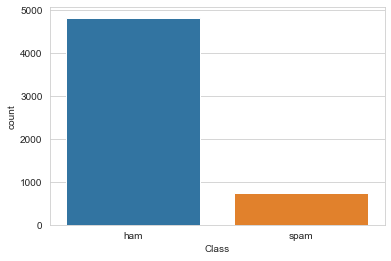

In [46]:
sns.countplot(data=df, x="Class")

In [47]:
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [48]:
# query ile Classı ham olanların textleri diye ayırabiliyoruz
Ham_texts=df.query('Class=="ham"')["Text"]
Spam_texts=df.query('Class=="spam"')["Text"]

In [49]:
Ham_texts

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 4825, dtype: object

In [50]:
def word_cleaner(data):
    words=[re.sub("[^a-zA-Z]"," ",i)for i in data] # noktalamalı kaldır
    words=[i.lower()for j in words for i in j.split()]#Splitting all the sentences into words# cümleleri kelimeye dönüştür
    words=[i for i in words if not i in set(stopwords.words("english"))]#removing stopwords
    words=[i for i in words if len(i)>2 ]#2 den büyük kelimeleri al # bu ozellik wordcloud da zaten var aslinda
    return words

In [51]:
def word_cleaner_print(data):
    words=[re.sub("[^a-zA-Z]"," ",i)for i in data] # noktalamalı kaldır
    print(words)
    print('\n')
    words=[i.lower()for j in words for i in j.split()]#Splitting all the sentences into words# cümleleri kelimeye dönüştür
    print(words)
    print('\n')
    words=[i for i in words if not i in set(stopwords.words("english"))]#removing stopwords
    print(words)
    print('\n')
    words=[i for i in words if len(i)>2 ]#2 den büyük kelimeleri al # bu ozellik wordcloud da zaten var aslinda
    print(words)
    print('\n')
    return words

In [52]:
word_cleaner_print(Ham_texts[:3])

['Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   ', 'Ok lar    Joking wif u oni   ', 'U dun say so early hor    U c already then say   ']


['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']


['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']


['jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'buffet', 'cine', 'got', 'amore', 'wat', 'lar', 'joking', 'wif', 'oni', 'dun', 'say', 'early', 'hor', 'already', 'say']




['jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'lar',
 'joking',
 'wif',
 'oni',
 'dun',
 'say',
 'early',
 'hor',
 'already',
 'say']

In [53]:
Ham_texts=df.query('Class=="ham"')["Text"]
ham_words=word_cleaner(Ham_texts)
ham_words_freq=nltk.FreqDist(ham_words)
ham_words_freq=pd.DataFrame(ham_words_freq.most_common(10),
                           columns=["Top Words","Frequency"])

In [54]:
re.sub("[^a-zA-Z]",' ', '&lt;#&gt;')

' lt   gt '

In [55]:
ham_words_freq

,Top Words,Frequency
0,get,311
1,know,236
2,call,236
3,got,233
4,good,233
5,like,232
6,come,228
7,day,216
8,time,201
9,love,199


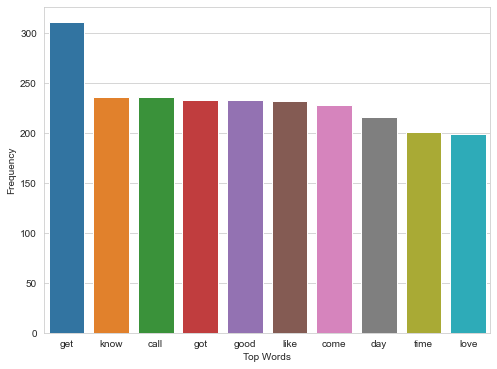

In [56]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax=sns.barplot(x="Top Words",y="Frequency",data=ham_words_freq)

In [57]:
" ".join(ham_words[:3])

'jurong point crazy'

In [58]:
def wc(data,bgcolor): # word cloud
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,max_words=100)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

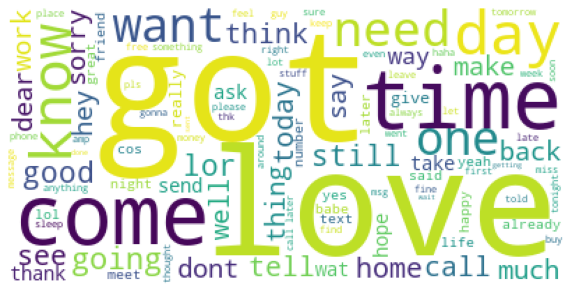

In [59]:
  wc(ham_words,"white")

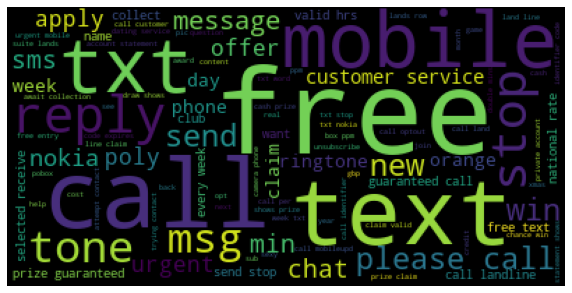

In [60]:
wc(word_cleaner(Spam_texts),'black')

In [61]:
def features_cleaner(data):
    clean_txt=[]
    for i in range(0,len(data)):
        text=re.sub("[^a-zA-Z]"," ",data[i])#Noktalama işareti kaldırma
        text=text.lower()
        text=text.split()
        ps=PorterStemmer()#kelimelerden ekleri çıkararak kök bulma
        text=[ps.stem(j)for j in text if not j in set(stopwords.words("english"))]
        # stopwords kaldırma   
        text=" ".join(text) # kelimeleri yeniden birleştirme
        clean_txt.append(text)
    return clean_txt

In [62]:
X=features_cleaner(df["Text"])
y=df["Label"]

In [63]:
print(X)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'search right word thank breather promis wont 

In [64]:
cv=CountVectorizer()#dummy variable gelişmiş hali
X_dtm=cv.fit_transform(X) # kelimeler vektör oldu
X_train,X_test,y_train,y_test=train_test_split(X_dtm,y,test_size=0.25,random_state=50)

In [65]:
classifier=MultinomialNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [66]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[1178,   15],
       [  16,  184]], dtype=int64)

<AxesSubplot:>

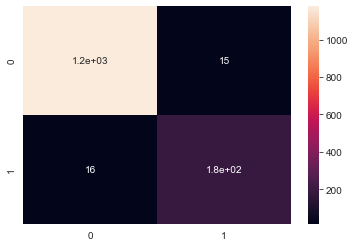

In [67]:
sns.heatmap(cf_matrix,annot=True)

In [68]:
accuracy_score(y_pred,y_test)

0.9777458722182341

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
r=RandomForestClassifier()
d=DecisionTreeClassifier()
gbc = GradientBoostingClassifier()

In [70]:
r.fit(X_train,y_train)
y_pred=r.predict(X_test)

In [71]:
r_matrix=confusion_matrix(y_pred,y_test)
r_matrix

array([[1192,   37],
       [   1,  163]], dtype=int64)

In [72]:
accuracy_score(y_pred,y_test)

0.9727207465900933

<AxesSubplot:>

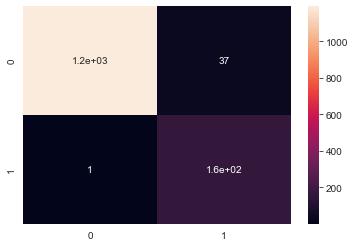

In [73]:
sns.heatmap(r_matrix,annot=True)

In [74]:
d.fit(X_train,y_train)
y_pred=d.predict(X_test)

In [75]:
d_matrix=confusion_matrix(y_pred,y_test)
d_matrix

array([[1179,   33],
       [  14,  167]], dtype=int64)

<AxesSubplot:>

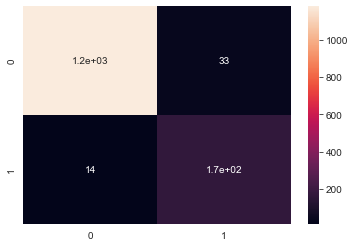

In [76]:
sns.heatmap(d_matrix,annot=True)

In [77]:
accuracy_score(y_pred,y_test)

0.9662598707824839

In [78]:
y_pred = gbc.fit(X_train, y_train).predict(X_test)

<AxesSubplot:>

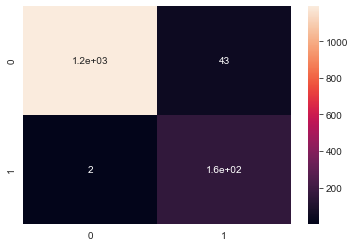

In [79]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [80]:
accuracy_score(y_pred,y_test)

0.9676956209619526